# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [111]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.weightstats import ztest

In [112]:
data = pd.io.stata.read_stata('C:/Users/sandhya/Documents/us_job_market_discrimination.dta')

In [113]:
data.columns

Index([u'id', u'ad', u'education', u'ofjobs', u'yearsexp', u'honors',
       u'volunteer', u'military', u'empholes', u'occupspecific', u'occupbroad',
       u'workinschool', u'email', u'computerskills', u'specialskills',
       u'firstname', u'sex', u'race', u'h', u'l', u'call', u'city', u'kind',
       u'adid', u'fracblack', u'fracwhite', u'lmedhhinc', u'fracdropout',
       u'fraccolp', u'linc', u'col', u'expminreq', u'schoolreq', u'eoe',
       u'parent_sales', u'parent_emp', u'branch_sales', u'branch_emp', u'fed',
       u'fracblack_empzip', u'fracwhite_empzip', u'lmedhhinc_empzip',
       u'fracdropout_empzip', u'fraccolp_empzip', u'linc_empzip', u'manager',
       u'supervisor', u'secretary', u'offsupport', u'salesrep', u'retailsales',
       u'req', u'expreq', u'comreq', u'educreq', u'compreq', u'orgreq',
       u'manuf', u'transcom', u'bankreal', u'trade', u'busservice',
       u'othservice', u'missind', u'ownership'],
      dtype='object')

In [114]:
data.shape

(4870, 65)

Dataframe has 4870 observatoons and 65 columns.

In [115]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [116]:
df = pd.DataFrame([data.call,data.race])
df = df.transpose() 
df['call']=df['call'].astype('int')
df.head()

,call,race
0,0,w
1,0,w
2,0,b
3,0,b
4,0,w


(array([ 9.19507187,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.80492813]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

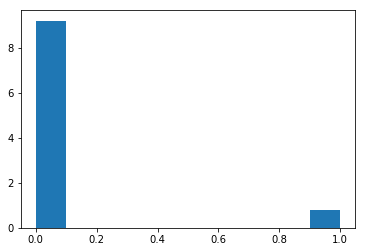

In [117]:
plt.hist(df.call, normed=True)

In [118]:
import scipy.stats as stats
x=df.call
stats.normaltest(x)

NormaltestResult(statistic=2983.7127106953803, pvalue=0.0)

p-value is less than 0.05, which implies data is not normally distributed.

In [119]:
# calculating p-hat for 'b' and 'w'
pivot_mean = df.pivot_table(index='race', values='call', aggfunc='mean').reset_index()
pivot_mean.head()

,race,call
0,b,0.064476
1,w,0.096509


#### What test is appropriate for this problem? Does CLT apply?

Z test is appropriate in this case as we are comparing the means of two populations with large (n ≥ 30).

##### Let's check the conditions for using the CLT on this sample:
The Central Limit Theorem applies even to binomial populations like this provided that the minimum of np and n(1-p) is at least 5. where "n" refers to the sample size, and "p" is the probability of "success" on any given trial.Here n=4870 'p' for race='b'=0.064 np=311 n(1-p)=4558
'p' for race='w'= 0.0965 np=470 n(1-p)=4400 which is greater than 5.

Independece: The sample observations are independents

They have been randombly selected

Sample size:
n>30 so the central limit theorm applies.

#### What are the null and alternate hypotheses?

##### Null Hypothesis :  :
Null Hypothesis: That there is no significant differenece between the proportion of calls recieved for resume with white-sounding names and those with black-sounding names
##### Alternative Hypothesis :  :
Alternative Hypothesis: That there is a significant difference between the proportion of calls recieved for resume with white-sounding names and the proportion of those with black-sounding names.

#### Compute margin of error, confidence interval, and p-value.

In [120]:
df_b=df.call[df['race']=='b']
df_w=df.call[df['race']=='w']
p_b=df_b.mean()
p_w=df_w.mean()
n1=len(df_b)
n2=len(df_w)
SE_diff=np.sqrt(p_b*(1-p_b)/n1+p_w*(1-p_w)/n2)
print SE_diff

0.00778337058668


In [121]:
# We are calculating at the 5% significance level so our critical value is 1.96
crit_val = 1.96
margin_error = abs(crit_val*SE_diff)
print("The true population proportion lies +/- %0.6F around the point estimate" % margin_error)

The true population proportion lies +/- 0.015255 around the point estimate


#### confidence interval

In [122]:
point_estimate=p_w-p_b
print point_estimate

0.0320328542094


In [123]:
CI=[point_estimate-margin_error,point_estimate+margin_error]
print("The proportion of resumes with white-sounding names that recieve a call is between %0.6F and %0.6F higher than the proportion of resume with black-sounding names" % (CI[1],CI[0]))

The proportion of resumes with white-sounding names that recieve a call is between 0.047288 and 0.016777 higher than the proportion of resume with black-sounding names


#### P-value

In [124]:

p_pool=data.call.mean()
z_score=((p_w-p_b)-0)/np.sqrt(p_pool*(1-p_pool)/n1+p_pool*(1-p_pool)/n2)
print z_score

4.10841206572


In [125]:
p_values = stats.norm.sf(abs(z_score))*2 #twoside
print("z-score is equal to : %6.3F  p-value equal to: %6.7F" % (z_score,p_values))

z-score is equal to :  4.108  p-value equal to: 0.0000398


In [126]:
df_b=df.call[df['race']=='b']
df_w=df.call[df['race']=='w']
ztest = ztest(df_b,df_w, alternative = 'two-sided')
print("Z-score is equal to : %6.3F  p-value equal to: %6.7F" % (abs(ztest[0]),ztest[1]))

Z-score is equal to :  4.115  p-value equal to: 0.0000388


In [127]:
np.sqrt(p_pool*(1-p_pool)*(1/n1+1/n2))

0.0

In [128]:
np.sqrt(p_pool*(1-p_pool)/n1+p_pool*(1-p_pool)/n2)

0.0077968942007328249